In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


יצירת הנתונים

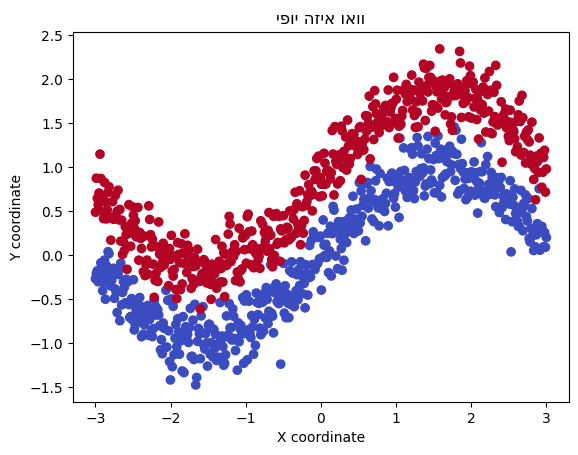

In [2]:
# מספר הדוגמאו
n_samples = 500

# קואורדינטת X (בין -3 ל-3)
x = np.linspace(-3, 3, n_samples)

# יוצרים שני גלים מופרדים
y1 = np.sin(x) + np.random.normal(scale=0.2, size=n_samples)  # גל ראשון
y2 = np.sin(x) + np.random.normal(scale=0.2, size=n_samples) + 0.85 # גל שני, מוזז למעלה

# מחברים הכל למטריצה של תכונות (X) ותיוגים (y)
X = np.column_stack((np.concatenate([x, x]), np.concatenate([y1, y2])))
y = np.array([0] * n_samples + [1] * n_samples)  # תיוגים לפי הגל

# הבה נראה מה יצא
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("יפוי הזיא ואוו")
plt.show()

In [3]:
# מחלקים ל-Train/Test
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [4]:
# בניית המודל
model = tf.keras.Sequential([
    #no input layer specified
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation = None) #lSigmoid later

])

In [20]:
# קומפילציה של המודל
model.compile (optimizer= tf.keras.optimizers.SGD(learning_rate= 0.005),
       loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), #sigmoid included
       metrics = ['accuracy', 'mse',
                tf.keras.metrics.Precision(),
                 'Recall']
               #tf.keras.metrics.
                      )

In [21]:
# אימון המודל
history  =model.fit(X_train,y_train, epochs=50,
                    batch_size = 32,
                    validation_data = (X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - Recall: 0.6961 - accuracy: 0.8287 - loss: 0.4109 - mse: 1.2565 - precision_4: 0.9412 - val_Recall: 0.7308 - val_accuracy: 0.8350 - val_loss: 0.4387 - val_mse: 1.1234 - val_precision_4: 0.9383
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Recall: 0.7125 - accuracy: 0.8343 - loss: 0.4182 - mse: 1.2816 - precision_4: 0.9367 - val_Recall: 0.7308 - val_accuracy: 0.8350 - val_loss: 0.4340 - val_mse: 1.1777 - val_precision_4: 0.9383
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Recall: 0.6835 - accuracy: 0.8280 - loss: 0.3994 - mse: 1.4714 - precision_4: 0.9314 - val_Recall: 0.7308 - val_accuracy: 0.8350 - val_loss: 0.4294 - val_mse: 1.2345 - val_precision_4: 0.9383
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Recall: 0.7352 - accuracy: 0.8403 - loss: 0.3906 - mse: 1.4677 - precision_4: 0.9190 - val_Recall: 0.7308 - val_accuracy: 0.8350 - val_loss: 0.4249 - val_mse: 1.2956 - val_precision_4: 0.9383
Epoch 5/50
25/25 ━━━━━━

In [11]:
#plot history
history.history.keys()

dict_keys(['Recall', 'accuracy', 'loss', 'precision_3', 'val_Recall', 'val_accuracy', 'val_loss', 'val_precision_3'])

In [16]:
import pandas as pd
pd.DataFrame(history.history).tail(3)

,Recall,accuracy,loss,precision_3,val_Recall,val_accuracy,val_loss,val_precision_3
47,0.689394,0.81875,0.434000,0.925424,0.701923,0.820,0.453326,0.935897
48,0.691919,0.82250,0.429093,0.931973,0.721154,0.830,0.448106,0.937500
49,0.696970,0.82000,0.424665,0.920000,0.730769,0.835,0.443162,0.938272


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

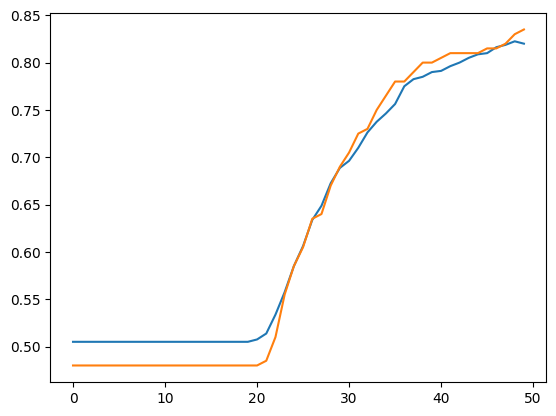

In [18]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

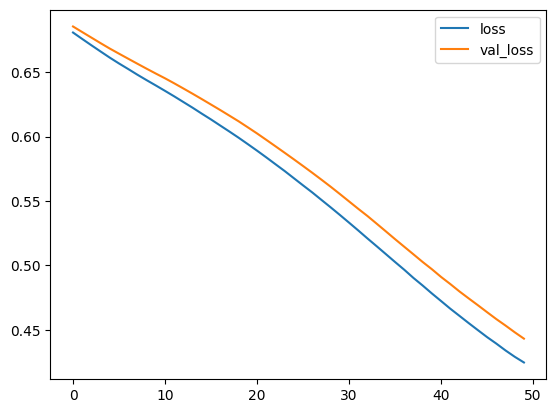

In [19]:
plt.plot(history.history['loss'], label= 'loss')
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.legend()

In [ ]:
%run PlotBoudary.ipynb

tf_plot_boundary(X,y,model)